# Bank Lending Project


## The Problem
The Bank has been losing money due to bad lending pratices through excessive lending that are not paid in time

    - For each customer who is estimated not to pay within the deadline but ends up paying, the bank incurs a cost of 1000 euros.
 
    - For each customer who is predicted to be a good payer but does not pay within the deadline, the bank incurs a cost of 3000 euros.

We need to help the bank figure out which customers will not be paying their loans within the stipulated schedule.

## The Questions:
Based on the problem the bank is facing we can ask several questions, in order to help the bank better manage its lending department

    1. How many features are available? How many customers?
    2. How many customers in the dataset were actually bad payers? And how many were not?
    3. Which model led to the best results? What metric was used to compare the different models?
    4. What are the most relevant features for determining if a customer is more likely to be a bad payer?
    5. What would be the cost for the bank without any model?
    6. What is the cost the bank incurs with your model?

In addition, based on the given information, we can define the following:

    True positive – Bad payers are correctly identified.
    True negative – Good payers are correctly identified.
    False positive – A good payer is identified as a bad payer.
    False negative – A bad payer is identified as a good payer.

## Import Libraries and Dataset

In [43]:
# Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier


In [2]:
# Dataset
data_path = '../data/'
df = pd.read_csv(data_path + 'lending_data.csv')

### Variables Dictionary

    ID: ID of each client
    LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
    SEX: Gender (1=male, 2=female)
    EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
    MARRIAGE: Marital status (1=married, 2=single, 3=others)
    AGE: Age in years
    PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
    PAY_2: Repayment status in August, 2005 (scale same as above)
    PAY_3: Repayment status in July, 2005 (scale same as above)
    PAY_4: Repayment status in June, 2005 (scale same as above)
    PAY_5: Repayment status in May, 2005 (scale same as above)
    PAY_6: Repayment status in April, 2005 (scale same as above)
    BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
    BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
    BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
    BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
    BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
    BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
    PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
    PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
    PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
    PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
    PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
    PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
    default.payment.next.month: Default payment (1=yes, 0=no)

## Exploring the Dataset

In [3]:
# overall view of the dataframe
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
# Checking dataframe size
print('The Dataframe has:', df.shape[0], 'entries')
print('The Dataframe has:', df.shape[1], 'variables')

The Dataframe has: 30000 entries
The Dataframe has: 25 variables


In [5]:
# Verifying nulls values
print(df.isnull().values.any())


False


In [6]:
# veryfing the prediction variable
df.groupby('default.payment.next.month')['default.payment.next.month'].count()

default.payment.next.month
0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [7]:
# Veryfing variable types
df.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

## Exploratory Data Analysis

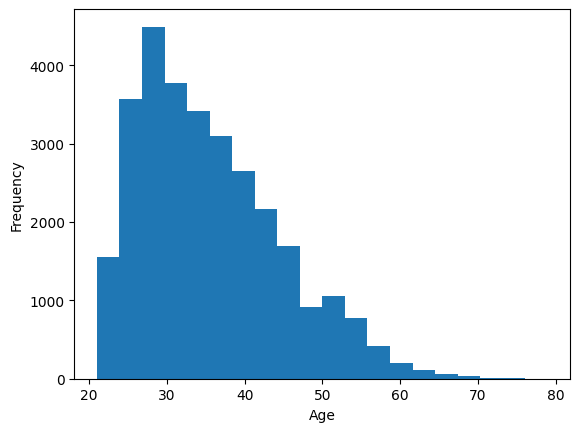

In [8]:
# Age

plt.hist(df["AGE"], bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

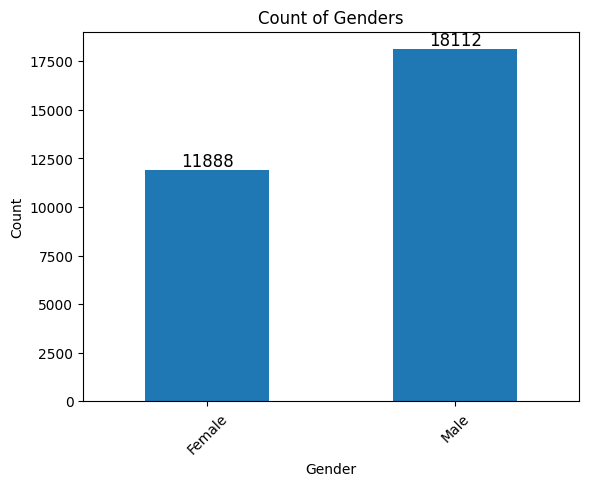

In [9]:
# Gender

gender_counts = df.groupby('SEX')['SEX'].count()

# Mapping the labels for better readability
gender_counts.index = gender_counts.index.map({1: 'Female', 2: 'Male'})

# Plotting the bar chart
ax = gender_counts.plot(kind='bar')

# Adding labels and title
plt.title('Count of Genders')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 3),
                textcoords='offset points')

plt.show()

In [10]:
# Education
df.groupby('EDUCATION')['EDUCATION'].count()

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

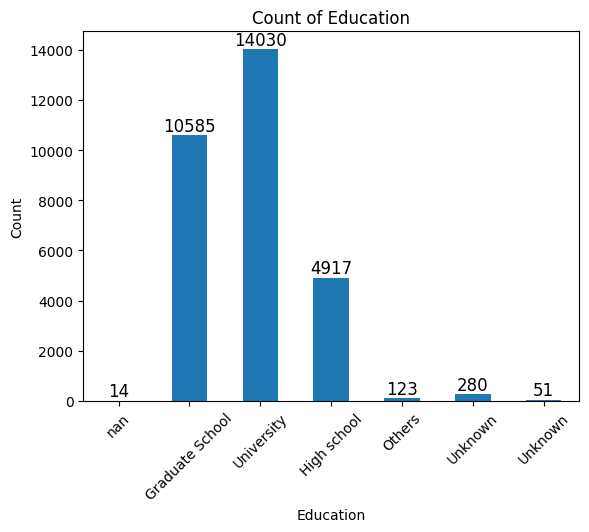

In [11]:
# Education

education_counts = df.groupby('EDUCATION')['EDUCATION'].count()

# Mapping the labels for better readability
education_counts.index = education_counts.index.map({1:'Graduate School', 2:'University', 3:'High school', 4:'Others', 5:'Unknown', 6:'Unknown'})

# Plotting the bar chart
ax = education_counts.plot(kind='bar')

# Adding labels and title
plt.title('Count of Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 3),
                textcoords='offset points')

plt.show()

In [12]:
# Marital Status
df.groupby('MARRIAGE')['MARRIAGE'].count()

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

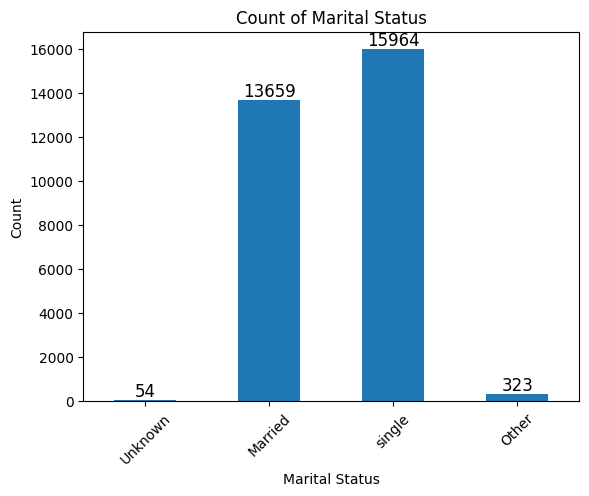

In [13]:
# Marital Status

marriage_counts = df.groupby('MARRIAGE')['MARRIAGE'].count()

# Mapping the labels for better readability
marriage_counts.index = marriage_counts.index.map({1:'Married', 2:'single', 3:'Other', 0:'Unknown'})

# Plotting the bar chart
ax = marriage_counts.plot(kind='bar')

# Adding labels and title
plt.title('Count of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 3),
                textcoords='offset points')

plt.show()

In [14]:
# we can observe that both Education and Marital Status have a nan category, a category that lack and ideintification.
# Education also has two unknown categories.
# Lets adress this issues

# Replace 6 with 5 in the 'Education' column
df['EDUCATION'] = df['EDUCATION'].replace({6: 5, 0: 4})
print(df['EDUCATION'].value_counts())

EDUCATION
2    14030
1    10585
3     4917
5      331
4      137
Name: count, dtype: int64


## Predictions

### Calculate a Cost Baseline

In [15]:
# removing client ID. unique value for each distinct client
df = df.drop('ID', axis = 1)

In [16]:
# Defining test_size so we can store it as a parameter

test_size = 0.2
seed = 42

In [17]:
train_set, test_set = train_test_split(df, test_size = test_size, random_state = seed)

X_train = train_set.drop(['default.payment.next.month'], axis = 'columns')
y_train = train_set['default.payment.next.month']

X_test = test_set.drop(['default.payment.next.month'], axis = 1)
y_test = test_set['default.payment.next.month']

In [18]:
# Applying Normalization

scaler = MinMaxScaler()

features_names = X_train.columns

X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = features_names)

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns = features_names)

let's calculate the baseline, that is, the cost we have without any model.

$$totalCost = 1000∗FP+3000∗FN$$

In [19]:
y_preds_all_bad = np.ones(y_test.shape) 

tn, fp, fn, tp = confusion_matrix(y_test, y_preds_all_bad).ravel()

print('Number of True Negatives:', tn)
print('Number of True Positives:', tp)
print('Number of False Negatives:', fn)
print('Number of False Positives:', fp)
print()
print('Total Cost:', fp*1000)
print('Accuracy', accuracy_score(y_test, y_preds_all_bad))

Number of True Negatives: 0
Number of True Positives: 1313
Number of False Negatives: 0
Number of False Positives: 4687

Total Cost: 4687000
Accuracy 0.21883333333333332


If the bank considers all clients as bad payers, it will incur a cost of **$4.687.000** with an accuracy of **0.2188**

In [20]:
y_preds_all_good = np.zeros(y_test.shape) 

tn, fp, fn, tp = confusion_matrix(y_test, y_preds_all_good).ravel()

print('Number of True Negatives:', tn)
print('Number of True Positives:', tp)
print('Number of False Negatives:', fn)
print('Number of False Positives:', fp)
print()
print('Total Cost:', fn*3000)
print('Accuracy', accuracy_score(y_test, y_preds_all_good))

Number of True Negatives: 4687
Number of True Positives: 0
Number of False Negatives: 1313
Number of False Positives: 0

Total Cost: 3939000
Accuracy 0.7811666666666667


If the bank considers all clients as good payers, it will incur a cost of **$3.939.000** with an accuracy of **0.7812**

### Support Functions

In [21]:
# Function to calculate the cost based on the prediction

def total_cost(y_test, y_preds, threshold = 0.5):
    
    tn, fp, fn, tp = confusion_matrix(y_test == 1, y_preds > threshold).ravel()
    
    cost_fn = fn*3000
    cost_fp = fp*1000
    
    return cost_fn + cost_fp

# Function to plot the threshold

def min_cost_threshold(y_test, y_preds):
    
    costs = {}
    
    for threshold in np.arange(0, 1.1, 0.1):
        
        costs[round(threshold, 1)] = total_cost(y_test, y_preds, threshold = threshold)
        
    plt.plot(list(costs.keys()), list(costs.values()))
    plt.ylabel('Cost')
    plt.xlabel('Threshold')
    plt.show()
    

## Predictions - Algorithms

Here we will explore 3 different algorithms and access the different between them
SVM, Random Forests, and XGBoost

### SVM

In [22]:
%%time

svc = SVC(random_state = seed, class_weight = 'balanced', gamma = 'scale', probability = True, verbose = True)

parameters = {'C':[0.1, 1, 10], 'kernel': ('rbf', 'linear') }

clf_svc = GridSearchCV(svc, parameters, cv = 5).fit(X_train, y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]CPU times: total: 8min 55s
Wall time: 37min 4s


In [23]:
y_preds = clf_svc.predict_proba(X_test)[:,1]

In [24]:
clf_svc.score(X_test, y_test)

0.7798333333333334

In [25]:
# Storing the score

acc = clf_svc.score(X_test, y_test)

In [26]:
total_cost(y_test, y_preds, threshold = 0.5)

np.int64(2926000)

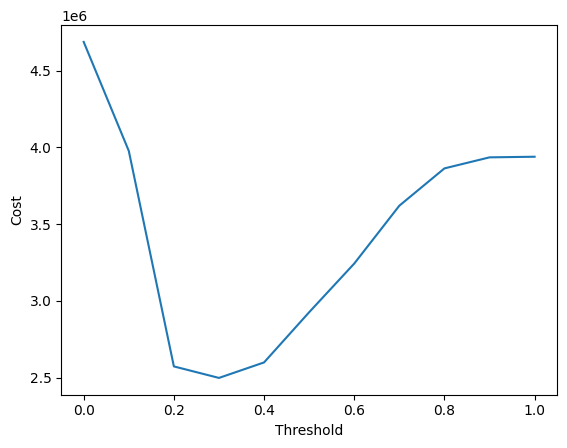

In [27]:
min_cost_threshold(y_test, y_preds)

In [28]:
total_cost(y_test, y_preds, threshold = 0.3)

np.int64(2498000)

In [29]:
# Storing the total cost as cost

cost = total_cost(y_test, y_preds, threshold = 0.3)

In [30]:
# Storing the best estimator for logistic regression model

tunned_svm = clf_svc.best_estimator_

In [32]:
print('Model: SVM')
print('Accuracy:', acc)
print('Bank Cost with model:', cost)
print('Best estimators:', tunned_svm)

Accuracy: 0.7798333333333334
Bank Cost with model: 2498000
Best 5 estimators: SVC(C=0.1, class_weight='balanced', probability=True, random_state=42,
    verbose=True)


###  Random Forest

In [33]:
%%time 
rf = RandomForestClassifier(random_state = seed,  class_weight = 'balanced').fit(X_train, y_train)

parameters = {'n_estimators':[10, 100, 300, 1000]}

clf_rf = GridSearchCV(rf, parameters, cv = 5).fit(X_train, y_train)

CPU times: total: 3min 38s
Wall time: 4min 53s


In [34]:
y_preds = clf_rf.predict_proba(X_test)[:,1]

clf_rf.score(X_test, y_test)

0.8148333333333333

In [35]:
# Storing the score

acc = clf_rf.score(X_test, y_test)

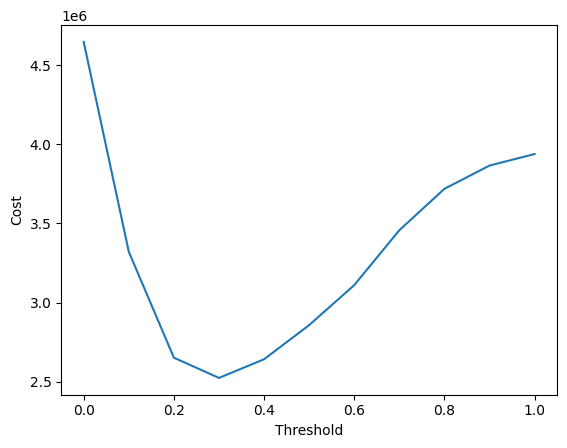

In [36]:
min_cost_threshold(y_test, y_preds)

In [37]:
total_cost(y_test, y_preds, threshold = 0.3)

np.int64(2523000)

In [38]:
# Storing the total cost as cost

cost = total_cost(y_test, y_preds, threshold = 0.3)

In [39]:
# Storing the best estimator for random_forest model

tunned_rf = clf_rf.best_estimator_

In [40]:
print('Model: RandomForest')
print('Accuracy:', acc)
print('Bank Cost with model:', cost)
print('Best estimators:', tunned_rf)

Accuracy: 0.8148333333333333
Bank Cost with model: 2523000
Best estimators: RandomForestClassifier(class_weight='balanced', random_state=42)


### xgboost

In [44]:
%%time 
xg = XGBClassifier(objective='binary:logistic', random_state=seed).fit(X_train, y_train)

parameters = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 1, 10, 100],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 1.5],
}

clf_xg = GridSearchCV(xg, parameters, cv = 5).fit(X_train, y_train)

CPU times: total: 9h 47min 42s
Wall time: 1h 58min 34s


In [45]:
y_preds = clf_xg.predict_proba(X_test)[:,1]

clf_xg.score(X_test, y_test)

0.8221666666666667

In [46]:
# Storing the score

acc = clf_xg.score(X_test, y_test)

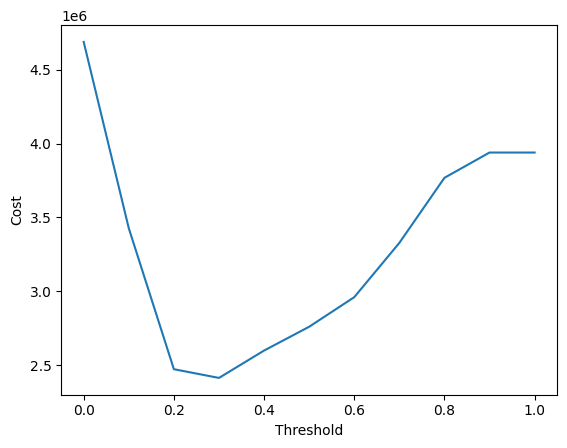

In [47]:
min_cost_threshold(y_test, y_preds)

In [48]:
total_cost(y_test, y_preds, threshold = 0.3)

np.int64(2415000)

In [49]:
# Storing the total cost as cost

cost = total_cost(y_test, y_preds, threshold = 0.3)

In [50]:
# Storing the best estimator for random_forest model

tunned_rf = clf_xg.best_estimator_

In [51]:
print('Model: xgboost')
print('Accuracy:', acc)
print('Bank Cost with model:', cost)
print('Best estimators:', tunned_rf)

Model: xgboost
Accuracy: 0.8221666666666667
Bank Cost with model: 2415000
Best estimators: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


In [52]:
xg_model = XGBClassifier(**clf_xg.best_params_).fit(X_train, y_train)

In [53]:
important_features = pd.DataFrame(data = xg_model.feature_importances_, index = X_train.columns, columns = ['value'])
important_features.sort_values(by = 'value', ascending = False)

,value
PAY_0,0.301379
PAY_3,0.113540
PAY_2,0.109509
PAY_4,0.101046
PAY_5,0.061607
PAY_AMT1,0.035587
PAY_AMT4,0.028025
PAY_AMT3,0.026944
PAY_6,0.025662
LIMIT_BAL,0.024549


## Conclusions

At the start of this Challenge we asked several questions so here are the answer

    1. How many features are available? How many customers?
    there are 30000 customers and 23 features, plus the customer ID and the customer classification

    2. How many customers in the dataset were actually bad payers? And how many were not?
    The original datatset had 6636 bad paying customers and 23364 good paying customers

    3. Which model led to the best results? What metric was used to compare the different models?
    Three different models were used in this challenge, SVM, random forest and XGBoost. XGBoost displayed the best accuracy at 0.82 and an associated cost of 2.415.000 euros (down from 3.939.000 euros if the bank considers all paying customer good paying customers).

    4. What are the most relevant features for determining if a customer is more likely to be a bad payer?
    Using XGBoost, the most relevant feature for determining a custumer as good or bad is PAY_0, Pay_3, and PAY_2.
    PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
    PAY_2: Repayment status in August, 2005 (scale same as above)
    PAY_3: Repayment status in July, 2005 (scale same as above)

    5. What would be the cost for the bank without any model?
    whiout the model the cost for tha bank would either be 3.939.000 euros if the bank considers all custumers as good or, 4.687.000 euros if the bank considers all customers bad.

    6. What is the cost the bank incurs with your model?
    With the selected model the bank incurs in a cost of 2.415.000 euros, less than 1.524.000 euros.